# Instituto Federal de Educação, Ciência e Tecnologia

## D2TEC - Tecnologias Big Data - Trabalho 01

Professora: Biana maria Pedrosa<br>
Aluno: Omar Hajime Fidelis<br>
Data: 28/09/2021

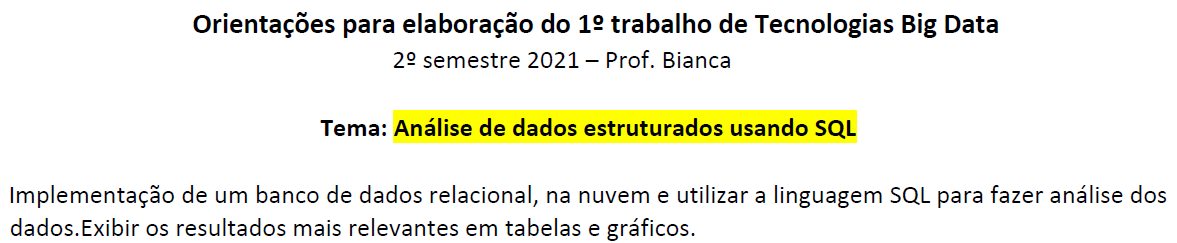

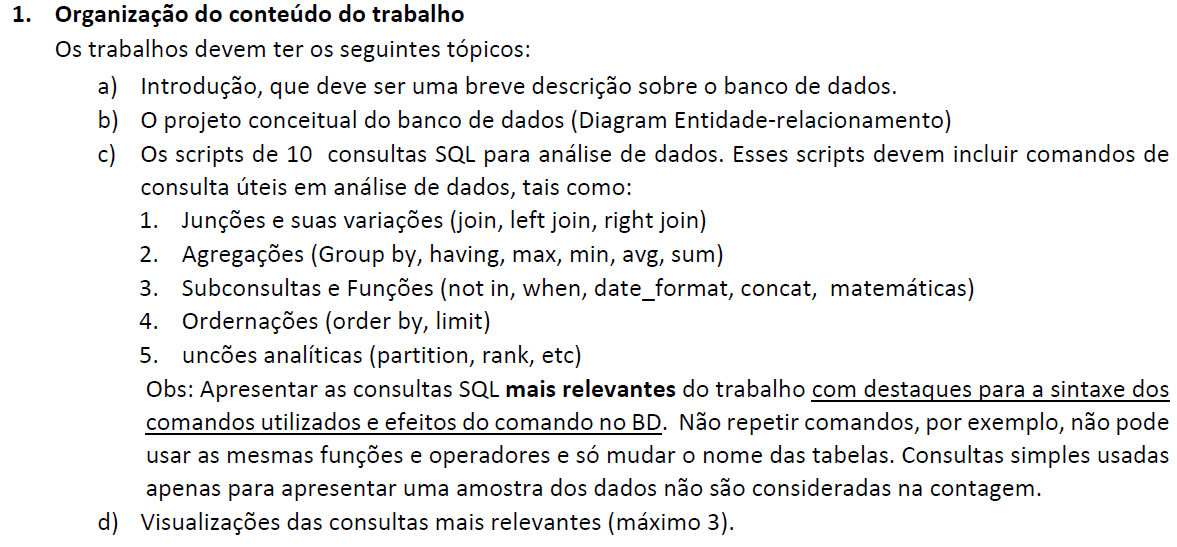

## 1. Introdução

Neste Trabalho 01 para o curso D2TEC - Tecnologias Big Data, selecionou-se o banco de dados "classicmodels" base de estudo para o desenvolvimento dos estudos solicitados.<br>
O banco de dados "classicmodels" é um varejista de miniaturas de carros e motocicletas clássicos. Ele contém dados comerciais típicos, como clientes, produtos, pedidos de vendas, itens de linha de pedido de vendas, etc.<br>
Abaixo, seguem as descrições da tabelas do Banco de Dados:<br>
<br>
Customers = Clientes: dados dos clientes.<br>
Products = Produtos: modelos de carros e motocicletas em escala.<br>
ProductLines = Linha de Produtos: categorias de linha de produto.<br>
Orders = Pedidos: pedidos de vendas feitos pelos clientes.<br>
OrderDetails = Detalhes dos Pedidos: itens de cada pedido de venda.<br>
Payments = Pagamentos: pagamentos feitos por clientes com base em suas contas.<br>
Employees = Funcionários: informações dos funcionários, bem como a estrutura da organização.<br>
Offices = Escritórios: escritório de vendas.<br>

## 2. Criação do Banco de Dados SQL na AWS (RDS)

### 2.1. Criação do Banco de Dados RDS (MySQL)

AWS - Crie um banco de dados MySQL e conecte-se a ele<Br>
https://aws.amazon.com/pt/getting-started/hands-on/create-mysql-db/

### 2.2. Configuração do VPC

Necessário inclusão do IP ou range de IPs do computador que necessita de acesso ao RDS<Br>
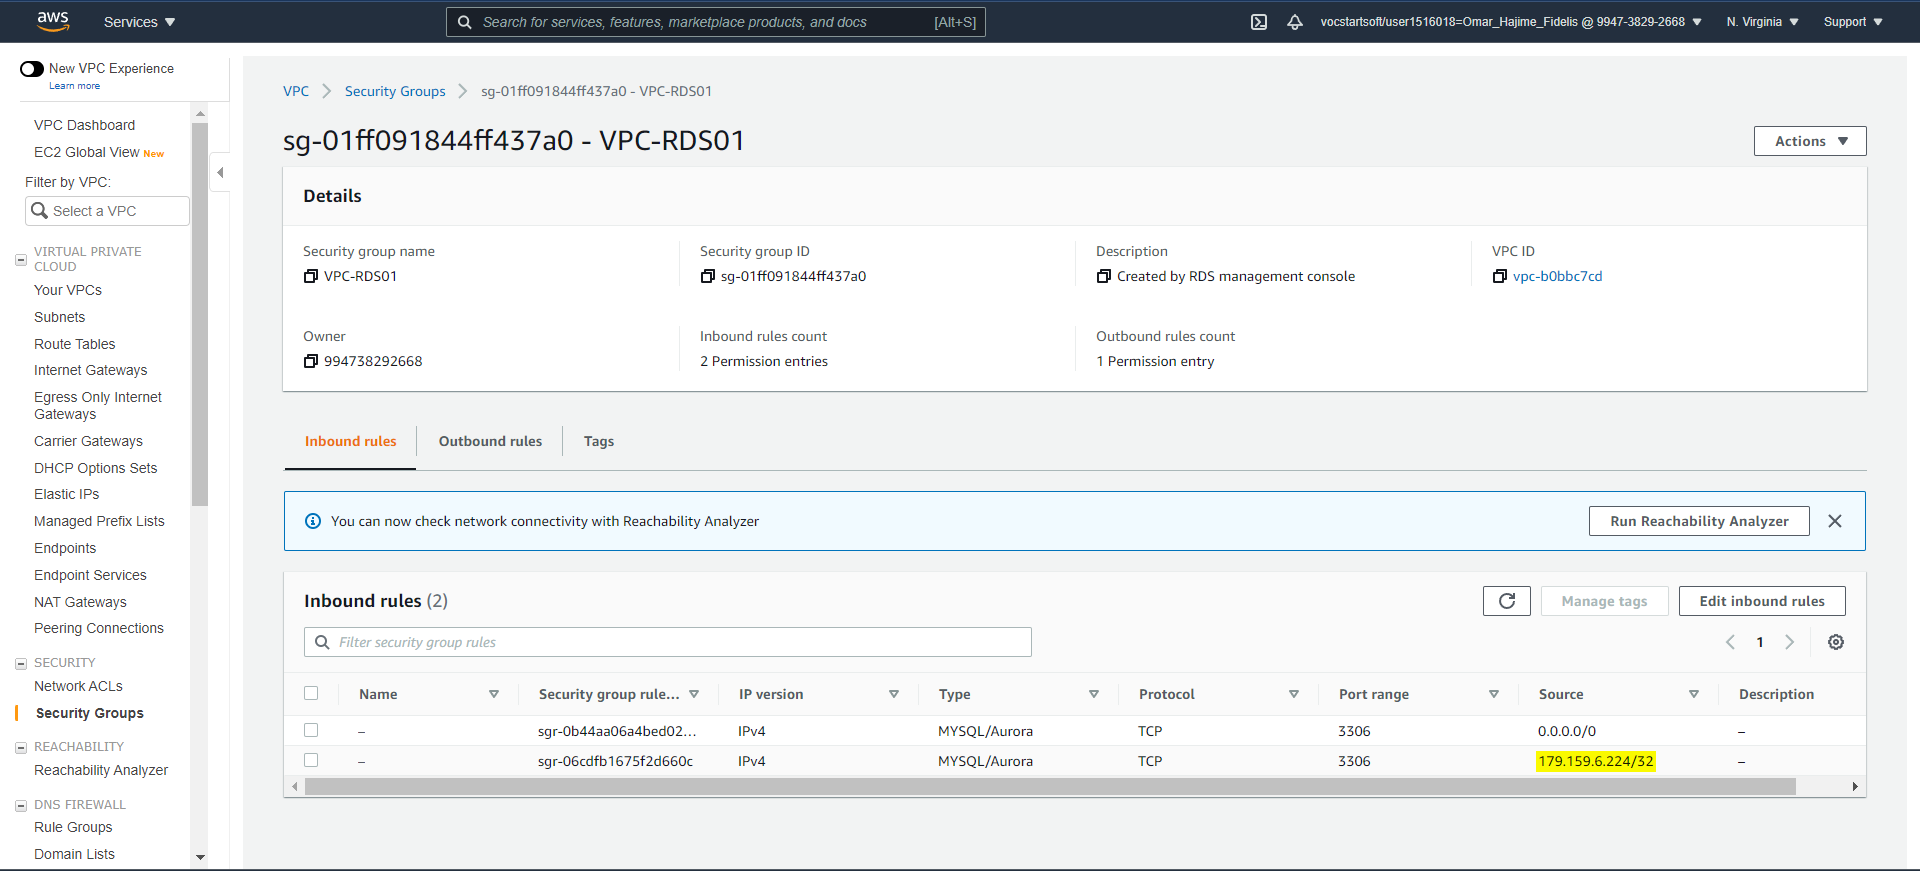

### 2.3. Utilização da ferramenta MySQL Benchmark

Download e Instalação da ferramenta MySQL Benchmark<Br>
https://www.mysql.com/products/workbench/

Configuração da conexão ferramenta MySQL Benchmark<Br>
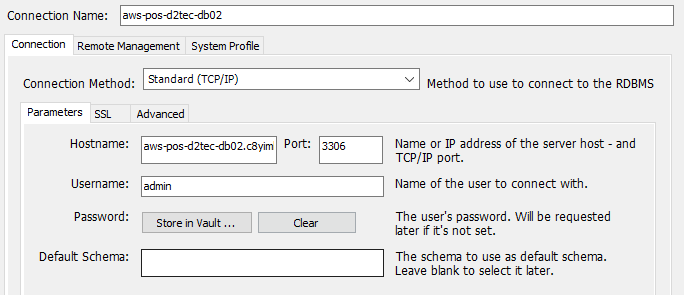

### 2.4. Carga da Base de Dados

Download e descompactar o arquivo ("mysqlsampledatabase.zip") de criação do Banco de Dados "classicmodels"<Br>
https://www.mysqltutorial.org/mysql-sample-database.aspx<Br>
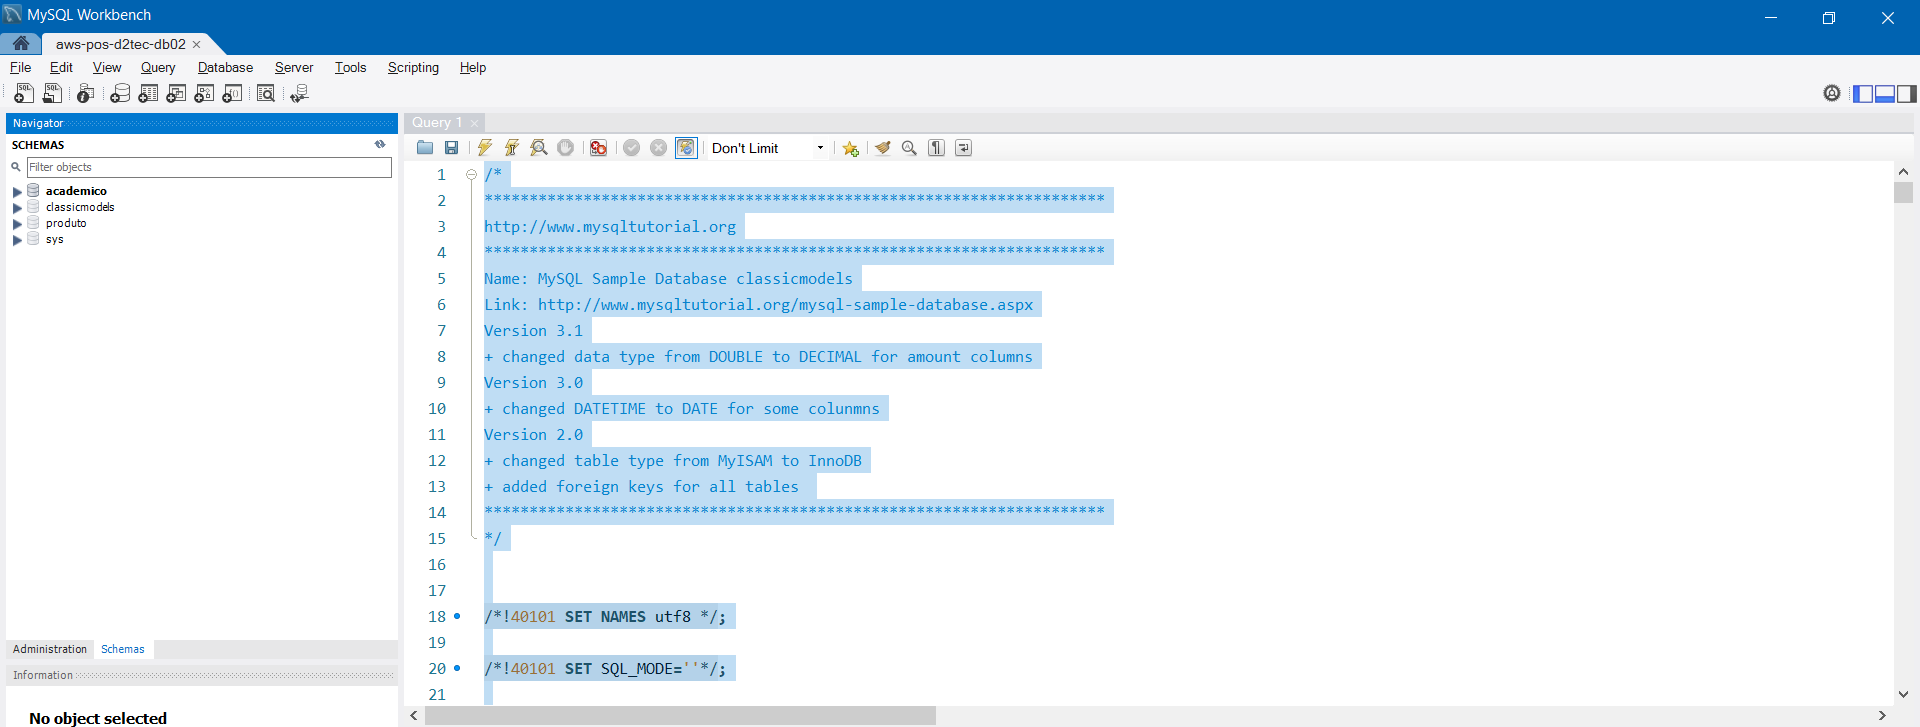

### 2.5. Criação e Permissão de Acesso de usuário

Criação de usuário de consulta do Banco de Dados RDS:<Br>
    
> CREATE USER 'db_user'@'%' IDENTIFIED BY 'db_user';<Br>
> GRANT SELECT ON classicmodels.* TO 'db_user'@'%';

### 2.6. Configuração do Python

Instalação da Biblioteca (no Sistemas Operacional):<Br>
<Br>
> pip3 install sqlalchemy<Br>

Utilização do notebook do Python<Br>
<Br>
> from sqlalchemy import create_engine<Br>
<Br>
> db_type = tipo do banco de dados<Br>
> db_user = usuário<Br>
> db_pwd = senha<Br>
> db_conn = conexão para banco de dados<Br>
> db_name = nome do banco de dados<Br>
> db_str = db_type + '://' + db_user + ':' + db_pwd + '@' + db_conn + '/' + db_name<Br>
> engine = create_engine(db_str)<Br>
<Br>
> sql_str = query em PL/SQL<Br>
> df = pd.read_sql(sql_str,con=engine)

## 3. Diagrama do Banco de Dados

### 3.1. Modelagem definida pelo criador do Banco de Dados
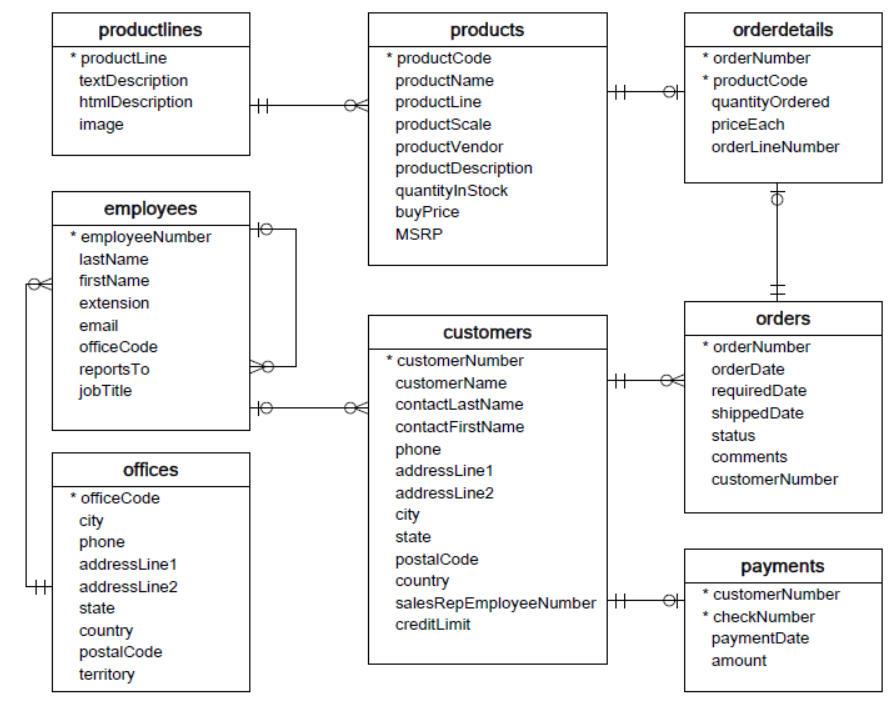

### 3.2. Diagrama do EER (Enhanced Entity-Relationship - via MySQL WorkBench)

Uma vez importado o Banco de Dados "classicmodels", utilizou-se a ferramenta MySQL WorkBench para gerar o diagrama abaixo (Engenharia Reversa):<br>
MySQL WorkBench -> Database -> Reverse Engineeer...<Br>
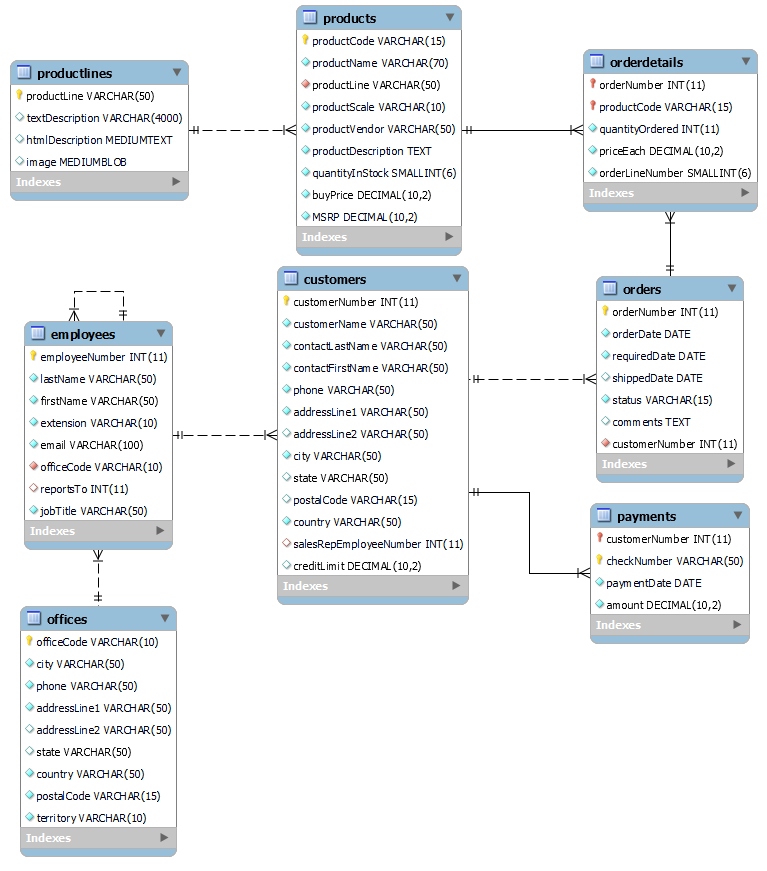

## 4. Consultas SQL

### 4.1. Preparação do ambiente

In [1]:
# Import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
db_type = 'mysql'
db_user = 'db_user'
db_pwd = 'db_user'
db_conn = 'aws-pos-d2tec-db02.c8yimbdkvnxe.us-east-1.rds.amazonaws.com'
db_name = 'classicmodels'
db_str = db_type + '://' + db_user + ':' + db_pwd + '@' + db_conn + '/' + db_name
#engine = create_engine('mysql://root:@localhost/classicmodels')
engine = create_engine(db_str)

### 4.2. Somente Funcionários com Cargo de Vendedor

In [3]:
sql_str = "SELECT \
    CONCAT(firstName, ' ', lastName) as Nome_Funcionario, \
    email, \
    jobTitle as Cargo \
FROM employees \
WHERE jobTitle = 'Sales Rep'"
df_1 = pd.read_sql(sql_str,con=engine)
df_1

,Nome_Funcionario,email,Cargo
0,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
1,Leslie Thompson,lthompson@classicmodelcars.com,Sales Rep
2,Julie Firrelli,jfirrelli@classicmodelcars.com,Sales Rep
3,Steve Patterson,spatterson@classicmodelcars.com,Sales Rep
4,Foon Yue Tseng,ftseng@classicmodelcars.com,Sales Rep
5,George Vanauf,gvanauf@classicmodelcars.com,Sales Rep
6,Loui Bondur,lbondur@classicmodelcars.com,Sales Rep
7,Gerard Hernandez,ghernande@classicmodelcars.com,Sales Rep
8,Pamela Castillo,pcastillo@classicmodelcars.com,Sales Rep
9,Larry Bott,lbott@classicmodelcars.com,Sales Rep


In [4]:
sql_str = "SELECT \
    count(*), \
    jobTitle as Cargo \
FROM employees \
GROUP by jobTitle"
df_1 = pd.read_sql(sql_str,con=engine)
df_1

,count(*),Cargo
0,1,President
1,1,VP Sales
2,1,VP Marketing
3,1,Sales Manager (APAC)
4,1,Sale Manager (EMEA)
5,1,Sales Manager (NA)
6,17,Sales Rep


### 4.3. Clientes com Limite de Crédito superior a $100.000

In [5]:
sql_str = "SELECT \
    customername as Cliente, \
    country as País, \
    state as Estado, \
    creditlimit as Limite_Crédito \
FROM customers \
WHERE country = 'USA' \
    AND state = 'CA' \
    AND creditlimit > 100000"
df_2 = pd.read_sql(sql_str,con=engine)
df_2

,Cliente,País,Estado,Limite_Crédito
0,Mini Gifts Distributors Ltd.,USA,CA,210500.0
1,Collectable Mini Designs Co.,USA,CA,105000.0
2,Corporate Gift Ideas Co.,USA,CA,105000.0


In [6]:
sql_str = "SELECT \
    customername as Cliente, \
    country as País, \
    state as Estado, \
    creditlimit as Limite_Crédito \
FROM customers \
WHERE country = 'USA' \
    AND state = 'CA' \
ORDER BY creditLimit DESC \
LIMIT 5"
df_2 = pd.read_sql(sql_str,con=engine)
df_2

,Cliente,País,Estado,Limite_Crédito
0,Mini Gifts Distributors Ltd.,USA,CA,210500.0
1,Corporate Gift Ideas Co.,USA,CA,105000.0
2,Collectable Mini Designs Co.,USA,CA,105000.0
3,Toys4GrownUps.com,USA,CA,90700.0
4,Technics Stores Inc.,USA,CA,84600.0


### 4.4. Quantidade de Funcionários por Escritório

In [7]:
sql_str = "SELECT \
    count(*) as Qtd_Funcionario, \
    E.officeCode as Cod_Escritorio, \
    O.city as Cidade, \
    O.country as País \
FROM employees E \
INNER JOIN offices O on O.officeCode = E.officeCode \
GROUP BY E.officeCode"
df_3 = pd.read_sql(sql_str,con=engine)
df_3

,Qtd_Funcionario,Cod_Escritorio,Cidade,País
0,6,1,San Francisco,USA
1,2,2,Boston,USA
2,2,3,NYC,USA
3,5,4,Paris,France
4,2,5,Tokyo,Japan
5,4,6,Sydney,Australia
6,2,7,London,UK


### 4.5. Distribuição dos Clientes por Cidades/Estado/País

In [8]:
sql_str = "SELECT count(*) as Qtd_Cliente, city as Cidade, state as Estado, country as País \
FROM customers \
GROUP by city \
ORDER by count(*) DESC, city, state, country ASC"
df_4 = pd.read_sql(sql_str,con=engine)
df_4

,Qtd_Cliente,Cidade,Estado,País
0,5,Madrid,None,Spain
1,5,NYC,NY,USA
2,3,Auckland,None,New Zealand
3,3,Brickhaven,MA,USA
4,3,Paris,None,France
...,...,...,...,...
90,1,Versailles,None,France
91,1,Warszawa,None,Poland
92,1,Wellington,None,New Zealand
93,1,White Plains,NY,USA


In [9]:
sql_str = "SELECT count(*) as Qtd_Cliente, country as País \
FROM customers \
GROUP by country \
ORDER by count(*) DESC, country ASC"
df_4 = pd.read_sql(sql_str,con=engine)
df_4

,Qtd_Cliente,País
0,36,USA
1,13,Germany
2,12,France
3,7,Spain
4,5,Australia
5,5,UK
6,4,Italy
7,4,New Zealand
8,3,Canada
9,3,Finland


### 4.6. Lista de Funcionários e seus respectivos Gerentes

In [10]:
sql_str = "SELECT \
    E1.employeeNumber as Num_Funcionário, \
    CONCAT(E1.firstName, ' ', E1.lastName) as Nome_Funcionario, \
    CASE \
        WHEN E2.employeeNumber is null THEN \"0000\" \
        ELSE E2.employeeNumber \
    END as Num_Gerente, \
    CASE \
        WHEN CONCAT(E2.firstName, ' ', E2.lastName) is null THEN \"----\" \
        ELSE CONCAT(E2.firstName, ' ', E2.lastName) \
    END as Nome_Gerente \
FROM employees E1 \
LEFT JOIN employees E2 on E1.reportsTo = E2.employeeNumber"
df_5 = pd.read_sql(sql_str,con=engine)
df_5

,Num_Funcionário,Nome_Funcionario,Num_Gerente,Nome_Gerente
0,1002,Diane Murphy,0000,----
1,1056,Mary Patterson,1002,Diane Murphy
2,1076,Jeff Firrelli,1002,Diane Murphy
3,1088,William Patterson,1056,Mary Patterson
4,1102,Gerard Bondur,1056,Mary Patterson
5,1143,Anthony Bow,1056,Mary Patterson
6,1165,Leslie Jennings,1143,Anthony Bow
7,1166,Leslie Thompson,1143,Anthony Bow
8,1188,Julie Firrelli,1143,Anthony Bow
9,1216,Steve Patterson,1143,Anthony Bow


### 4.7. Valor de cada Ordem e Nome do Cliente

In [11]:
sql_str = "SELECT \
    OD.orderNumber as Num_Ordem, \
    C.customerName as Nome_Cliente, \
    sum(OD.quantityOrdered * OD.priceEach) as Valor_Total \
FROM orderdetails OD \
INNER JOIN orders O on O.orderNumber = OD.orderNumber \
INNER JOIN customers C on C.customerNumber = O.customerNumber \
GROUP BY OD.orderNumber"
df_6 = pd.read_sql(sql_str,con=engine)
df_6

,Num_Ordem,Nome_Cliente,Valor_Total
0,10123,Atelier graphique,14571.44
1,10298,Atelier graphique,6066.78
2,10345,Atelier graphique,1676.14
3,10124,Signal Gift Stores,32641.98
4,10278,Signal Gift Stores,33347.88
...,...,...,...
321,10243,Diecast Collectables,6276.60
322,10138,Kelly's Gift Shop,32077.44
323,10179,Kelly's Gift Shop,22963.60
324,10360,Kelly's Gift Shop,52166.00


### 4.8. Distribuição do Status dos Pedidos e Tempo para Envio do Pedido

In [12]:
sql_str = "SELECT \
    count(*), \
    status \
FROM orders \
GROUP by status"
df_7 = pd.read_sql(sql_str,con=engine)
df_7

,count(*),status
0,303,Shipped
1,4,Resolved
2,6,Cancelled
3,4,On Hold
4,3,Disputed
5,6,In Process


In [13]:
sql_str = "SELECT \
    orderNumber as Num_Ordem, \
    orderDate as Data_Pedido, \
    shippedDate as Data_Envio, \
    DATEDIFF(shippedDate,orderDate) as Tempo_Envio \
FROM orders \
WHERE shippedDate is not NULL"
df_7 = pd.read_sql(sql_str,con=engine)
df_7

,Num_Ordem,Data_Pedido,Data_Envio,Tempo_Envio
0,10100,2003-01-06,2003-01-10,4
1,10101,2003-01-09,2003-01-11,2
2,10102,2003-01-10,2003-01-14,4
3,10103,2003-01-29,2003-02-02,4
4,10104,2003-01-31,2003-02-01,1
...,...,...,...,...
307,10415,2005-05-09,2005-05-12,3
308,10416,2005-05-10,2005-05-14,4
309,10417,2005-05-13,2005-05-19,6
310,10418,2005-05-16,2005-05-20,4


### 4.9. Produto sem nenhuma venda

In [14]:
sql_str = "SELECT \
    count(distinct productCode) \
FROM  products"
df_8 = pd.read_sql(sql_str,con=engine)
df_8

,count(distinct productCode)
0,110


In [15]:
sql_str = "SELECT \
    count(distinct productCode) \
FROM orderdetails"
df_8 = pd.read_sql(sql_str,con=engine)
df_8

,count(distinct productCode)
0,109


In [16]:
sql_str = "SELECT \
    count(quantityOrdered) as Qtd_Pedido, \
    P.productCode as Cod_Produto, \
    productName as Nome_Produto \
FROM orderdetails OD \
RIGHT JOIN products P on P.productCode = OD.productCode \
GROUP BY OD.productCode \
HAVING count(quantityOrdered) = 0"
df_8 = pd.read_sql(sql_str,con=engine)
df_8

,Qtd_Pedido,Cod_Produto,Nome_Produto
0,0,S18_3233,1985 Toyota Supra


### 4.10. Produtos com maior Fator de Lucro

In [17]:
sql_str = "SELECT \
    P.productCode as Cod_Produto, \
    P.productName as Produto, \
    OD.orderNumber as Num_Ordem, \
    round(OD.priceEach/P.buyPrice,2) as Lucro \
FROM products P \
INNER JOIN orderdetails OD on OD.productCode = P.productCode \
ORDER BY round(OD.priceEach/P.buyPrice,2) DESC"
df_9 = pd.read_sql(sql_str,con=engine)
df_9

,Cod_Produto,Produto,Num_Ordem,Lucro
0,S12_3990,1970 Plymouth Hemi Cuda,10211,2.50
1,S18_2625,1936 Harley Davidson El Knucklehead,10298,2.50
2,S24_3420,1937 Horch 930V Limousine,10178,2.50
3,S24_3420,1937 Horch 930V Limousine,10249,2.50
4,S24_3420,1937 Horch 930V Limousine,10262,2.50
...,...,...,...,...
2991,S18_4600,1940s Ford truck,10291,1.14
2992,S18_4600,1940s Ford truck,10323,1.14
2993,S24_3856,1956 Porsche 356A Coupe,10192,1.14
2994,S24_3856,1956 Porsche 356A Coupe,10342,1.14


In [18]:
sql_str = "SELECT \
    OD.orderNumber as Num_Ordem, \
    round(avg(OD.priceEach/P.buyPrice),2) as Lucro \
FROM products P \
INNER JOIN orderdetails OD on OD.productCode = P.productCode \
GROUP BY OD.orderNumber \
ORDER BY 2 DESC"
df_9 = pd.read_sql(sql_str,con=engine)
df_9

,Num_Ordem,Lucro
0,10116,2.26
1,10421,2.24
2,10189,2.09
3,10298,2.02
4,10198,1.95
...,...,...
321,10290,1.43
322,10199,1.43
323,10323,1.34
324,10376,1.31


### 4.11. Distribuição das Linhas de Produtos por Compra (Ordem)

In [19]:
sql_str = "SELECT \
    OD.orderNumber as Num_Ordem, \
    P.productLine as Linha_Produto, \
    (OD.quantityOrdered * OD.priceEach) as Valor_Total \
FROM orderdetails OD \
INNER JOIN products P on OD.productCode = P.productCode \
GROUP BY OD.orderNumber, P.productLine \
WITH ROLLUP"
df_10 = pd.read_sql(sql_str,con=engine)
df_10

,Num_Ordem,Linha_Produto,Valor_Total
0,10100.0,Vintage Cars,1660.12
1,10100.0,None,1660.12
2,10101.0,Vintage Cars,2701.50
3,10101.0,None,2701.50
4,10102.0,Vintage Cars,3726.45
...,...,...,...
1053,10424.0,None,1046.50
1054,10425.0,Classic Cars,4996.62
1055,10425.0,Trucks and Buses,3167.67
1056,10425.0,None,3167.67


### 4.12. Distribuição dos Valores Totais por Código de Produto em cada Venda (Ordem)

In [20]:
sql_str = "SELECT \
    orderNumber as Num_Ordem, \
    productCode as Cod_Produto, \
    quantityOrdered * priceEach as Valor_Total, \
    min(quantityOrdered * priceEach) OVER (PARTITION by orderNumber) as Min_Valor_Total, \
    max(quantityOrdered * priceEach) OVER (PARTITION by orderNumber) as Max_Valor_Total, \
    avg(quantityOrdered * priceEach) OVER (PARTITION by orderNumber) as Avg_Valor_Total, \
    sum(quantityOrdered * priceEach) OVER (PARTITION by orderNumber) as Soma_Valor_Total \
FROM orderdetails"
df_11 = pd.read_sql(sql_str,con=engine)
df_11

,Num_Ordem,Cod_Produto,Valor_Total,Min_Valor_Total,Max_Valor_Total,Avg_Valor_Total,Soma_Valor_Total
0,10100,S18_1749,4080.00,1660.12,4080.00,2555.957500,10223.83
1,10100,S18_2248,2754.50,1660.12,4080.00,2555.957500,10223.83
2,10100,S18_4409,1660.12,1660.12,4080.00,2555.957500,10223.83
3,10100,S24_3969,1729.21,1660.12,4080.00,2555.957500,10223.83
4,10101,S18_2325,2701.50,1463.85,4343.56,2637.252500,10549.01
...,...,...,...,...,...,...,...
2991,10425,S24_2300,6261.71,553.52,6261.71,3201.803077,41623.44
2992,10425,S24_2840,986.42,553.52,6261.71,3201.803077,41623.44
2993,10425,S32_1268,3435.39,553.52,6261.71,3201.803077,41623.44
2994,10425,S32_2509,553.52,553.52,6261.71,3201.803077,41623.44


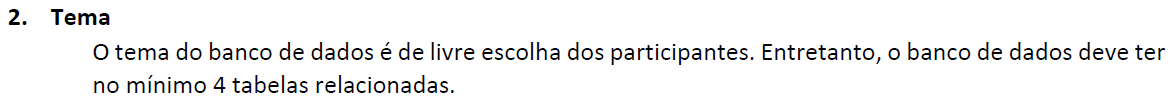

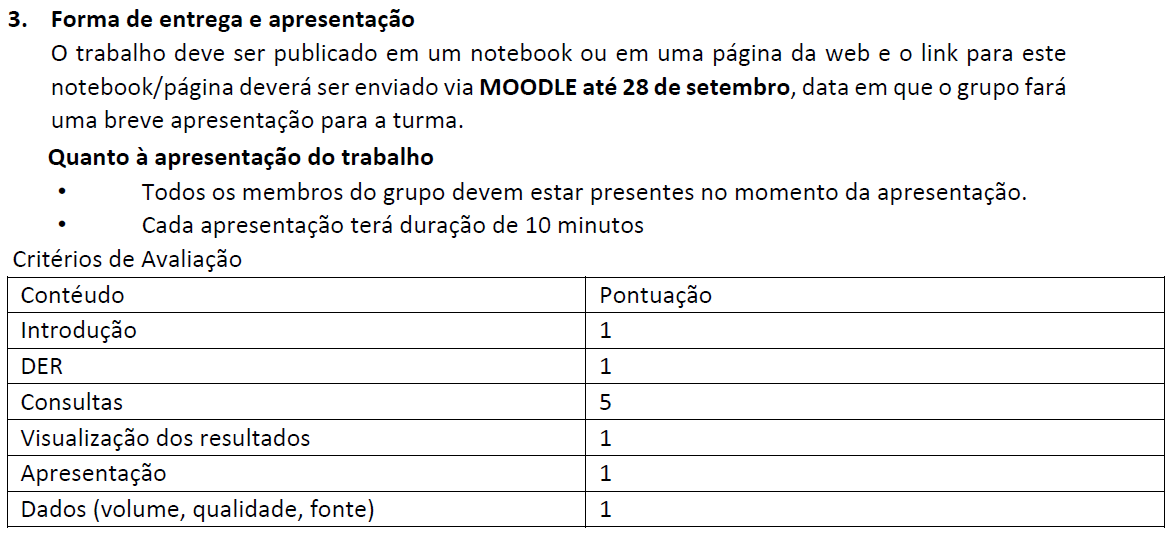

## 5. Referência Bibliográfica

MySQL Tutorial / MySQL Sample Database<BR>
https://www.mysqltutorial.org/mysql-sample-database.aspx